In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from collections import Counter

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output
pd.set_option('display.float_format', '{:.6f}'.format) # Set the float format otherwise it will use the scientific way to display


In [2]:
# Load the datasets

# This dataset contains 6 CSV files, but we potentially only need to use 1 - 3 of them

# The calendar data records the price and availability of each listing for each date. 
# The calendar file is too big to load into github, this file would be ignored. 
# df_calendar = pd.read_csv('data/calendar.csv')

# The listings data primarily describes the attributes of each property listing.
# It provides information including location (neighborhood, latitude, longitude), 
# property type (entire home/apt, private room, shared room), price, number of bedrooms, amenities and more.
# This data is essential for understanding the characteristics of the properties available on Airbnb,
# so this data would be used in my analysis as a main stream.
df_listing = pd.read_csv('data/listings.csv')

# The reviews dataset contains reviews that customers gave for the listings. 
# This data could be used for understanding customer satisfaction and feedback, so this could potentially be used in my analysis.
df_review = pd.read_csv('data/reviews.csv')



## Introduction

When planning for travel, accommodation is usually one of the most important factors to consider.

We need to evaluate multiple factors, such as the number of people it can accommodate, location, and price - these are the major considerations. Other factors may also affect the selection of accommodation, such as amenities like Wi-Fi and TV, the number of reviews left by previous customers, etc.

In this analysis, I want to identify the factors that affect the price of a listing and explore ways to save money when booking accommodation while traveling.


# High Level Data Explore

In [3]:
# display the first 5 rows of the DataFrame to understand its structure
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20211028222535,2021-10-29,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,Tokyo,Would love to travel all over the world and me...,within a day,100%,100%,f,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1.000000,1.000000,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,NaN,Sumida Ku,NaN,35.717070,139.826080,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.000000,2.000000,"[""Shampoo"", ""Kitchen"", ""Essentials"", ""Microwav...","$11,000.00",3,365,3.000000,3.000000,365.000000,365.000000,3.000000,365.000000,NaN,t,28,58,88,363,2021-10-29,165,0,0,2012-09-25,2019-11-14,4.760000,4.730000,4.910000,4.830000,4.820000,4.510000,4.780000,M130003350,f,1,1,0,0,1.490000
1,776070,https://www.airbnb.com/rooms/776070,20211028222535,2021-10-29,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1.000000,1.000000,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Kita-ku, Tokyo, Japan",Kita Ku,NaN,35.738440,139.769170,Private room in residential home,Private room,2,NaN,1 shared bath,1.000000,1.000000,"[""Air conditioning"", ""Shampoo"", ""Iron"", ""Ether...","$7,950.00",3,14,3.000000,3.000000,14.000000,14.000000,3.000000,14.000000,NaN,t,27,48,65,245,2021-10-29,228,0,0,2013-09-17,2020-01-18,4.970000,4.960000,4.920000,4.970000,4.970000,4.840000,4.910000,M130000243,t,1,0,1,0,2.310000
2,1196177,https://www.airbnb.com/rooms/1196177,20211028222535,2021-10-29,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,"Adachi City, Tokyo, Japan",出身地 東京\r\n好きなこと 旅行､ﾃﾆｽ\r\n\r\nA host is the hu...,within a day,100%,NaN,t,https://a0.muscache.com/im/users/5686404/profi...,https://a0.muscache.com/im/users/5686404/profi...,Adachi District,2.000000,2.000000,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"足立区, 東京都, Japan",Adachi Ku,NaN,35.744750,139.797310,Private room in residential home,Private room,2,NaN,1 shared bath,1

In [4]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...


We can tell if need to join reviews dataset and listings dataset, `listing_id` should be used in reviews to join listings dataset

In [5]:
# Display the shape of the DataFrame to understand its dimensions
listings_number = df_listing['id'].count()
hosts_number = len(df_listing['host_id'].unique())

print(f'{listings_number} listings provided by {hosts_number} hosts.')

10414 listings provided by 2605 hosts.


In [6]:
# There are too many columns, see columns available in this DataFrame
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [7]:
# only see columns that may interest us
df_cleaned = df_listing[['id', 'name', 'host_id', 
       'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights','has_availability',
       'host_response_time', 'host_response_rate', 
       'host_is_superhost',  'host_has_profile_pic', 'host_identity_verified', 'host_verifications',
       'calendar_last_scraped', 'number_of_reviews','last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
df_cleaned.tail(3)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,has_availability,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_verifications,calendar_last_scraped,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10411,52974109,★36間部屋新築ホテル割引有月額7万★東上野Artsy Inn セミダブルルーム,31734605,KS Home,NaN,Taito Ku,35.711891,139.783498,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"[""Air conditioning"", ""Shampoo"", ""Carbon monoxi...","$5,999.00",1,t,within an hour,100%,f,t,t,"['email', 'phone', 'facebook', 'reviews', 'wei...",2021-10-29,0,NaN,NaN,23,86
10412,52974300,★36間部屋新築ホテル割引有月額6万5★東上野 Artsy Inn シングルルーム,31734605,KS Home,NaN,Taito Ku,35.713552,139.783347,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"[""Air conditioning"", ""Shampoo"", ""Carbon monoxi...","$5,999.00",1,t,within an hour,100%,f,t,t,"['email', 'phone', 'facebook', 'reviews', 'wei...",2021-10-29,0,NaN,NaN,23,86
10413,53014539,"Entire140㎡ Big house,3floors,Shinjuku ,4mins t...",63598456,Spring,NaN,Shinjuku Ku,35.689559,139.717948,Entire residential home,Entire home/apt,16,NaN,6.000000,12.000000,"[""Air conditioning"", ""Shampoo"", ""Iron"", ""Carbo...","$25,714.00",1,t,within an hour,100%,f,t,t,"['email', 'phone', 'google', 'reviews', 'offli...",2021-10-29,0,NaN,NaN,18,27


In [8]:
# get info about the DataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10414 non-null  int64  
 1   name                            10414 non-null  object 
 2   host_id                         10414 non-null  int64  
 3   host_name                       10386 non-null  object 
 4   neighbourhood                   7756 non-null   object 
 5   neighbourhood_cleansed          10414 non-null  object 
 6   latitude                        10414 non-null  float64
 7   longitude                       10414 non-null  float64
 8   property_type                   10414 non-null  object 
 9   room_type                       10414 non-null  object 
 10  accommodates                    10414 non-null  int64  
 11  bathrooms                       0 non-null      float64
 12  bedrooms                        

# Handle Irrelavant data

In [9]:
# columns where all values are the same (constant feature)
constant_features = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print('Constant Features: ', constant_features)

Constant Features:  []


In [10]:
# # There is not any constant features, thus nothing to drop at the moment. 
# # If there are any, can use the following to drop:
# df_no_constant_features = df_cleaned.drop(columns=constant_features)

# Columns with mostly missing values (e.g. more than x% missing)
threshold = 20
print(f'Total records: {df_cleaned.shape[0]}')
print('*' * 50)
for col in df_cleaned.columns:
    missing_count = df_cleaned[col].isnull().sum()
    missing_ratio = (missing_count / df_cleaned.shape[0]) * 100
    if missing_ratio > threshold:
        print(f'Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%) ')
        print('*' * 50)

Total records: 10414
**************************************************
Column: neighbourhood has 2658 missing values (25.52%) 
**************************************************
Column: bathrooms has 10414 missing values (100.00%) 
**************************************************
Column: host_response_time has 2825 missing values (27.13%) 
**************************************************
Column: host_response_rate has 2825 missing values (27.13%) 
**************************************************
Column: last_review has 2118 missing values (20.34%) 
**************************************************
Column: reviews_per_month has 2118 missing values (20.34%) 
**************************************************


In [11]:


# From above we can see that due to total count is 10414, columns such as neighbourhood has missing values that are more than 25%, 
# but neighbourhood_cleansed do not hold any missing values, it is possible that it gets clean by reading latitude and longitude values.
# There are also missing values on bedrooms, beds, we need to process the null values before analyzing. Most of the missing values are
# at the review score section (>20% missing ratio).
# For some reason, there is no bathroom info, so better ignore this column.
# Also remove neighbourhood column because neighbourhood_cleansed is better.

# df_cleaned = df_cleaned.drop(columns = ['bathrooms','neighbourhood'])
# Remove columns with more than x%
columns_to_drop = [col for col in df_cleaned.columns if (df_cleaned[col].isnull().sum() / df_cleaned.shape[0]) * 100 > threshold]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

df_cleaned.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,10414.000000,36115186.183503,10967576.988398,197677.000000,29699353.000000,38606899.000000,43718353.750000,53014539.000000
host_id,10414.000000,198893670.841751,117743424.394377,771694.000000,85022417.000000,210199913.000000,299176279.000000,428038217.000000
latitude,10414.000000,35.696715,0.041135,35.540970,35.685733,35.702615,35.719633,35.830640
longitude,10414.000000,139.736454,0.071668,139.095680,139.701300,139.732470,139.784980,139.911580
accommodates,10414.000000,4.182735,2.993691,0.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,9559.000000,1.440841,1.167330,1.000000,1.000000,1.000000,2.000000,40.000000
beds,9676.000000,2.670215,2.324449,1.000000,1.000000,2.000000,3.000000,56.000000
minimum_nights,10414.000000,3.818706,25.464387,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10414.000000,26.401575,43.849124,0.000000,1.000000,8.000000,33.000000,489.000000
calculated_host_listings_count,10414.000000,12.591511,14.267708,1.000000,3.000000,8.000000,17.000000,98.000000


In [12]:
# From above there is an abnormal value! 
# max of minimum nights - 999 is clearly larger than 365 days in a year
# We can see that price is not included in the statistics, it is because it is a string type column, we need to convert it to numeric.
# We can also see that there are some odd min and max values for accommodates, bedrooms, and beds.
# Later better pay more attention to this column and process them when need

# host name is not a factor that can provide us with any insight, host id already gives information about the host identifier.
df_cleaned =  df_cleaned.drop(columns=['host_name'])


## Start to process DataFrame slightly - missing values

In [13]:
# Display the DataFrame having missing values
df_missing_data = df_cleaned[df_cleaned.isnull().any(axis=1)]

# df_missing_data

In [14]:
df_missing_data.tail()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,host_verifications,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365
10389,52822268,人気の新宿・浅築・ブリティッシュブルー・２人・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715450,139.699200,Entire rental unit,Entire home/apt,2,NaN,1.000000,"[""Security cameras on property"", ""Air conditio...","$10,000.00",1,t,f,t,t,"['email', 'phone', 'work_email']",2021-10-29,0,13,179
10390,52822308,人気の新宿・浅築・モダンな和風グリーントーン・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"[""Security cameras on property"", ""Air conditio...","$10,000.00",1,t,f,t,t,"['email', 'phone', 'work_email']",2021-10-29,0,13,179
10391,52822342,人気の新宿・浅築・モダンな和風 赤いトーン・高田馬場駅から徒歩７分の好立地・高速Wifi・長期割引,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"[""Security cameras on property"", ""Air conditio...","$10,000.00",1,t,f,t,t,"['email', 'phone', 'work_email']",2021-10-29,0,13,179
10399,52908934,long-term stays OK@JROtsukasta.5mins walk#3ppl,197405131,Toshima Ku,35.731130,139.734780,Entire rental unit,Entire home/apt,3,1.000000,NaN,"[""Cleaning products"", ""Shampoo"", ""Kitchen"", ""E...","$4,240.00",1,t,f,t,t,"['email', 'phone', 'jumio', 'offline_governmen...",2021-10-29,0,49,148
10400,52909995,JROtsuka 5min#Minimalist House#FreeWifi&Max3(402),197405131,Toshima Ku,35.729030,139.734570,Entire rental unit,Entire home/apt,3,1.000000,NaN,"[""Drying rack for clothing"", ""Cleaning product...","$6,320.00",1,t,f,t,t,"['email', 'phone', 'jumio', 'offline_governmen...",2021-10-29,0,49,144


In [15]:
# Investigate more on the missing values
df_cleaned.isnull().sum()

id                                  0
name                                0
host_id                             0
neighbourhood_cleansed              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                          855
beds                              738
amenities                           0
price                               0
minimum_nights                      0
has_availability                    0
host_is_superhost                  28
host_has_profile_pic               28
host_identity_verified             28
host_verifications                 28
calendar_last_scraped               0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [16]:

# process the missing data to fill them with 0; host related columns can be filled with 'f' or something empty
df_cleaned.fillna({'bedrooms':0, 'beds':0, 'host_is_superhost':'f', 'host_has_profile_pic':'f', 'host_identity_verified':'f', 'host_verifications':''},inplace=True)

# replace columns with value of 't' with 1, 'f' with 0
df_cleaned['has_availability'] = df_cleaned['has_availability'].replace({'t': 1, 'f': 0})
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].replace({'t': 1, 'f': 0})
df_cleaned['host_has_profile_pic'] = df_cleaned['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df_cleaned['host_identity_verified'] = df_cleaned['host_identity_verified'].replace({'t': 1, 'f': 0})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10414 non-null  int64  
 1   name                            10414 non-null  object 
 2   host_id                         10414 non-null  int64  
 3   neighbourhood_cleansed          10414 non-null  object 
 4   latitude                        10414 non-null  float64
 5   longitude                       10414 non-null  float64
 6   property_type                   10414 non-null  object 
 7   room_type                       10414 non-null  object 
 8   accommodates                    10414 non-null  int64  
 9   bedrooms                        10414 non-null  float64
 10  beds                            10414 non-null  float64
 11  amenities                       10414 non-null  object 
 12  price                           

C:\Users\mouhu\AppData\Local\Temp\ipykernel_137936\3196653106.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['has_availability'] = df_cleaned['has_availability'].replace({'t': 1, 'f': 0})
C:\Users\mouhu\AppData\Local\Temp\ipykernel_137936\3196653106.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].replace({'t': 1, 'f': 0})
C:\Users\mouhu\AppData\Local\Temp\ipykernel_137936\3196653106.py:7: FutureWarning: Downcasting behavior in `replace` is deprec

In [17]:
# Identify numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = df_cleaned.select_dtypes(include=['object','category']).columns
print("Numerical columns: ", numerical_columns)
print("Categorical columns: ", categorical_columns)

Numerical columns:  Index(['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bedrooms',
       'beds', 'minimum_nights', 'has_availability', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical columns:  Index(['name', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'amenities', 'price', 'host_verifications', 'calendar_last_scraped'],
      dtype='object')


In [18]:
# check if any missing numerical and categorical values
missing_numerical_columns = df_cleaned[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
missing_categorical_columns = df_cleaned[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print('Numerical columns with missing values: ', missing_numerical_columns.tolist())
print('Categorical columns with missing values: ', missing_categorical_columns.tolist())

Numerical columns with missing values:  []
Categorical columns with missing values:  []


# Start to handle abnormal data

In [19]:
# We noticed that price column have a dtype of "object" that suppose to be a number like float64.
# If price stays as object, then it would not be able to give us any insight such as mean price etc.
# Explore on price column
df_cleaned['price'].head()

0    $11,000.00
1     $7,950.00
2     $3,000.00
3    $32,571.00
4    $11,286.00
Name: price, dtype: object

In [807]:
# The reason why it is treated as object is due to the currency symbol as prefix. 
# Price also comes with comma as the separator for thousands.
# Also the currency symbol does not look correct, it should be Janpanese Yen (￥) instead of dollars.
# Convert this price column into a float64
df_cleaned['price'] = df_cleaned['price'].replace('[$,]','',regex=True).astype(np.float64)
df_cleaned['price']

0         11000.000000
1          7950.000000
2          3000.000000
3         32571.000000
4         11286.000000
5         28886.000000
6         22857.000000
7          4000.000000
8          4000.000000
9         10286.000000
10         6266.000000
11         6266.000000
12         4266.000000
13         4266.000000
14         3300.000000
15         3300.000000
16        10286.000000
17         4000.000000
18        68929.000000
19        12000.000000
20        12000.000000
21        27000.000000
22         6266.000000
23         4266.000000
24         4266.000000
25         4266.000000
26         3873.000000
27         4500.000000
28        13000.000000
29        22000.000000
30        13000.000000
31         6729.000000
32         5500.000000
33         4500.000000
34         5643.000000
35         4500.000000
36         6800.000000
37         5000.000000
38         2500.000000
39         3800.000000
40        16098.000000
41        15000.000000
42         5841.000000
43        3

In [808]:
# remove rows with price = 0, because a listing with price of 0 does not make sense and make no value for analysis
df_cleaned = df_cleaned[df_cleaned['price'] > 0]

In [809]:
# check if there are any missing values
missing_numerical_columns = df_cleaned[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print('Numerical columns with missing values: ', missing_numerical_columns.tolist())

Numerical columns with missing values:  []


In [810]:
# Handling categorical variables: amenities and host_verifications

def find_value_from_list(row, column_name, value):
    ''' 
    Retrieve a value from a list in the specified column of a dataframe row.
    
    This function will process the value in the given column by removing unwanted characters e.g. quotes, brackets, curly braces
    and checks if the specified value exists in the processed list. 
    If the value is found, it returns 1.0; otherwise, it returns 0.0.
    
    Args:
        row (pandas.Series): A row from the DataFrame.
        column_name (str): The name of the column containing the list.
        value (str): The value to check for in the list.
        
    Returns:
        float: 1.0 if the value is found in the list; 0.0 otherwise.
    '''
    # use float type to prevent issues
    val = 0.0
    try:
        # remove any single quotes, double quotes, [, ] and curly braces
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

# define function to split list values in columns

def split_list_into_columns(input_df, column_name, max_num = 10):
    ''' 
    Split list values in a column into separate columns and indicate the presence of specific values.
    
    Args:
        input_df (pandas.DataFrame): The input dataframe containing the column to be processed.
        column_name (str): The name of the column containing lists in string format.
        max_num (int, optional): The maximum number of unique values to consider for splitting into columns. Default is 10.

    Returns:
        pandas.DataFrame: The original dataframe with additional columns indicating the presence of specific values.
    '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in input_df[column_name].unique(): 
        # remove any single quotes, double quotes, [, ] and curly braces
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_num]:
        # use apply function to loop through each row and apply find_value_from_list function
        input_df[column_name + '_' + value[0]] = input_df.apply(lambda row: find_value_from_list(row, column_name, value[0]), axis=1)
        
    return

In [811]:
# Split amenities and host_verifications into columns and drop the original column
split_list_into_columns(df_cleaned, 'host_verifications')
df_cleaned = df_cleaned.drop(columns = ['host_verifications'])

split_list_into_columns(df_cleaned, 'amenities')
df_cleaned = df_cleaned.drop(columns = ['amenities'])

In [812]:
df_cleaned.head()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
0,197677,Oshiage Holiday Apartment,964081,Sumida Ku,35.717070,139.826080,Entire rental unit,Entire home/apt,4,1.000000,2.000000,11000.000000,3,1,0,1,0,2021-10-29,165,1,363,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,776070,Kero-kero house room 1,801494,Kita Ku,35.738440,139.769170,Private room in residential home,Private room,2,1.000000,1.000000,7950.000000,3,1,1,1,1,2021-10-29,228,1,245,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2,1196177,Stay with host Cozy private room Senju area,5686404,Adachi Ku,35.744750,139.797310,Private room in residential home,Private room,2,1.000000,2.000000,3000.000000,2,1,1,1,1,2021-10-29,95,1,88,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1249571,Unique stay! New&1min to the subway,6809418,Shibuya Ku,35.651110,139.721650,Entire residential home,Entire home/apt,3,1.000000,1.000000,32571.000000,4,1,1,1,1,2021-10-29,102,1,320,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
4,1298200,Pine House 2 Bed Room + 2 Toilets,6606987,Katsushika Ku,35.738500,139.851670,Entire residential home,Entire home/apt,4,2.000000,4.000000,11286.000000,4,1,1,1,1,2021-10-29,339,2,183,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [813]:
# Price looks correct now as float64 data type.
# Now lets see some stats and whether if there are missing values
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10388.000000,36080960.134963,10959769.160181,197677.000000,29661396.750000,38560503.500000,43707752.750000,53014539.000000
host_id,10388.000000,198386271.592992,117451648.407664,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10388.000000,35.696774,0.041132,35.540970,35.685806,35.702645,35.719670,35.830640
longitude,10388.000000,139.736389,0.071729,139.095680,139.701220,139.732350,139.784990,139.911580
accommodates,10388.000000,4.193204,2.990103,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10388.000000,1.325857,1.185905,0.000000,1.000000,1.000000,1.000000,40.000000
beds,10388.000000,2.487197,2.342637,0.000000,1.000000,2.000000,3.000000,56.000000
price,10388.000000,13492.560166,46724.074664,825.000000,4499.500000,7300.000000,12857.000000,2185000.000000
minimum_nights,10388.000000,3.825760,25.495846,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10388.000000,0.996534,0.058770,0.000000,1.000000,1.000000,1.000000,1.000000


In [814]:
# Count are all 10414 so no missing values. 
# By compare with previous stats, we also noticed that min is 0 for accommodates, price.
# Min is 0 for bedrooms and beds are due to we used 0 to fill missing values. Min is 0 for number of reviews is reasonable.
# Now have a look on rows that have a 0 of accommodates and price, separately.
df_cleaned[df_cleaned['accommodates'] == 0]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water


In [815]:
# By looking at the data above, these are all hotel rooms, with no bedrooms, no bed, no accommodates and no price.
# I want to treat this as abnormal values and get them remove.
df_cleaned = df_cleaned[df_cleaned['accommodates'] != 0]

# Check on stats now
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10388.000000,36080960.134963,10959769.160181,197677.000000,29661396.750000,38560503.500000,43707752.750000,53014539.000000
host_id,10388.000000,198386271.592992,117451648.407664,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10388.000000,35.696774,0.041132,35.540970,35.685806,35.702645,35.719670,35.830640
longitude,10388.000000,139.736389,0.071729,139.095680,139.701220,139.732350,139.784990,139.911580
accommodates,10388.000000,4.193204,2.990103,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10388.000000,1.325857,1.185905,0.000000,1.000000,1.000000,1.000000,40.000000
beds,10388.000000,2.487197,2.342637,0.000000,1.000000,2.000000,3.000000,56.000000
price,10388.000000,13492.560166,46724.074664,825.000000,4499.500000,7300.000000,12857.000000,2185000.000000
minimum_nights,10388.000000,3.825760,25.495846,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10388.000000,0.996534,0.058770,0.000000,1.000000,1.000000,1.000000,1.000000


In [816]:
# Looks like fixing the accommodates abnormal values also erase the problem with price is zero issue.
# Lets look at some columns that have 0 as bedrooms and beds.
df_bd0 = df_cleaned[df_cleaned['beds'] == 0]
df_bdr0 = df_cleaned[df_cleaned['bedrooms'] == 0]
df_bdnr0 = df_cleaned[(df_cleaned['bedrooms'] == 0) | (df_cleaned['beds'] == 0)]
df_bd0.shape

(712, 41)

In [817]:
df_bdr0.shape

(829, 41)

In [818]:
df_bdnr0.shape

(1467, 41)

In [819]:
# There are 712 rows without a bed and 829 rows without a bedroom.
# 1467 listings are either without a bedroom or a bed
# Check on room_type of them
# Then get stats on accommodates, bedrooms, beds, price
df_bd0['room_type'].value_counts()


room_type
Entire home/apt    413
Private room       256
Shared room         24
Hotel room          19
Name: count, dtype: int64

In [820]:
df_bd0[['accommodates', 'bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,712.000000,3.558989,2.585125,1.000000,2.000000,3.000000,4.000000,16.000000
bedrooms,712.000000,1.198034,1.134473,0.000000,1.000000,1.000000,1.000000,21.000000
beds,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,712.000000,10475.115169,14435.682196,1257.000000,3924.750000,6058.500000,10000.000000,150000.000000


In [821]:
df_bd0[df_bd0['room_type'] == 'Entire home/apt'][['accommodates','bedrooms', 'beds', 'price']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
accommodates,413.000000,4.092010,2.664265,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,413.000000,1.184019,0.878567,0.000000,1.000000,1.000000,1.000000,5.000000
beds,413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,413.000000,10365.617433,13741.627656,1833.000000,4254.000000,6500.000000,10086.000000,115000.000000


In [822]:
df_bdr0['room_type'].value_counts()

room_type
Entire home/apt    755
Private room        56
Hotel room          18
Name: count, dtype: int64

In [823]:
df_bdr0[['accommodates', 'bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,829.000000,2.975875,1.518611,1.000000,2.000000,3.000000,4.000000,16.000000
bedrooms,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beds,829.000000,1.691194,1.076172,0.000000,1.000000,2.000000,2.000000,10.000000
price,829.000000,11685.252111,51440.045365,1500.000000,4165.000000,6000.000000,8571.000000,999999.000000


In [824]:
df_bdr0[df_bdr0['room_type'] == 'Entire home/apt'][['accommodates','bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,755.000000,2.866225,1.374979,1.000000,2.000000,2.000000,3.000000,16.000000
bedrooms,755.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beds,755.000000,1.617219,0.976091,0.000000,1.000000,2.000000,2.000000,10.000000
price,755.000000,11026.905960,49991.205265,2000.000000,4147.000000,5940.000000,8107.000000,999999.000000


In [825]:
# Maybe in Japan they use Tatami or something to sleep and they do not treat those as beds.
# Most room types are either 1 private room or an entire home/apt. 
# Here I choose to replace Private room, Hotel room and Shared room's bedroom and beds with 1 if bedroom or beds is 0.
# And to replace Entire home/apt's bedrooms and beds to the mean values of bedrooms and beds with 0 as bedroom or beds, which is 1 and 2.

# We can also try to fill these values with mean, median, mode etc. 
# for example df_filled_mean = df.fillna(df.mean(numeric_only = True))
# Fill with mode (all columns) .iloc[0] is used to get the first mode if there are multiple modes for a given column
# for example df_filled_mode = df.fillna(df.mode().iloc[0])

mask = (
    df_cleaned['room_type'].isin(['Private room', 'Hotel room', 'Shared room']) &
    (df_cleaned['bedrooms'] == 0)
)
df_cleaned.loc[mask, ['bedrooms']] = 1

mask = (
    df_cleaned['room_type'].isin(['Private room', 'Hotel room', 'Shared room']) &
    (df_cleaned['beds'] == 0)
)
df_cleaned.loc[mask, ['beds']] = 1

mask = (
    df_cleaned['room_type'].isin(['Entire home/apt']) &
    (df_cleaned['bedrooms'] == 0)
)
df_cleaned.loc[mask, ['bedrooms']] = 1

mask = (
    df_cleaned['room_type'].isin(['Entire home/apt']) &
    (df_cleaned['beds'] == 0)
)
df_cleaned.loc[mask, ['beds']] = 2

df_cleaned.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,10388.000000,36080960.134963,10959769.160181,197677.000000,29661396.750000,38560503.500000,43707752.750000,53014539.000000
host_id,10388.000000,198386271.592992,117451648.407664,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10388.000000,35.696774,0.041132,35.540970,35.685806,35.702645,35.719670,35.830640
longitude,10388.000000,139.736389,0.071729,139.095680,139.701220,139.732350,139.784990,139.911580
accommodates,10388.000000,4.193204,2.990103,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10388.000000,1.405660,1.126133,1.000000,1.000000,1.000000,1.000000,40.000000
beds,10388.000000,2.595495,2.263908,1.000000,1.000000,2.000000,3.000000,56.000000
price,10388.000000,13492.560166,46724.074664,825.000000,4499.500000,7300.000000,12857.000000,2185000.000000
minimum_nights,10388.000000,3.825760,25.495846,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10388.000000,0.996534,0.058770,0.000000,1.000000,1.000000,1.000000,1.000000


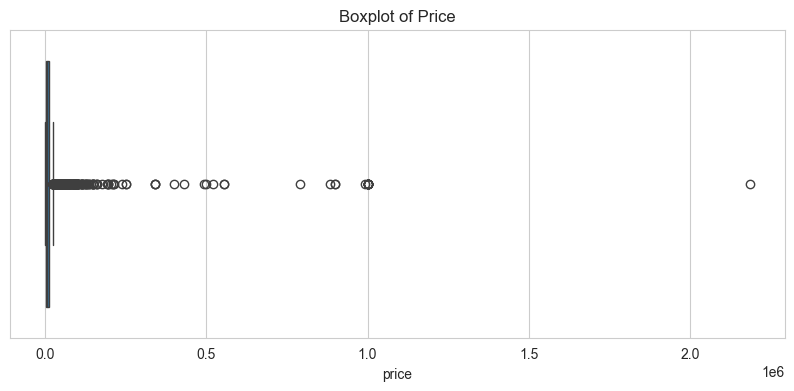

In [826]:
# We can notice that some abnormal max, such as price, bedrooms, beds, etc.
# Visualize price
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['price'])
plt.title('Boxplot of Price')
plt.show()

In [827]:
# From the boxplot, we can see that there are some outliers in the price that is higher than 120k.
# let's find this record
df_cleaned[df_cleaned['price'] > 120000]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
95,5240174,Designer's Flat - Shibuya YOYOGI park 10mins No.2,24477517,Shibuya Ku,35.663390,139.687410,Entire rental unit,Entire home/apt,4,1.000000,1.000000,999999.000000,2,1,1,1,1,2021-10-29,193,4,123,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
146,6719865,Yanesen Traditional Nagaya house,11025259,Taito Ku,35.720240,139.766070,Entire residential home,Entire home/apt,6,3.000000,6.000000,883228.000000,3,1,0,1,1,2021-10-29,134,1,238,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
227,8721795,UNIQUE HOUSE! 15 mins. to SHIBUYA!,34561184,Setagaya Ku,35.651910,139.669710,Entire residential home,Entire home/apt,7,3.000000,4.000000,128000.000000,2,1,0,1,1,2021-10-29,5,5,363,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
455,13175130,SALE！Free Wifi☆Cozy town Ueno! MK184,73434559,Taito Ku,35.718500,139.766340,Entire rental unit,Entire home/apt,4,1.000000,4.000000,150000.000000,1,1,0,1,1,2021-10-29,97,1,18,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
749,16848056,52 people can stay,57699141,Taito Ku,35.705920,139.794980,Entire rental unit,Entire home/apt,16,13.000000,18.000000,130000.000000,1,1,0,1,1,2021-10-29,8,27,90,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1164,21520095,A东京池袋站步行4分钟新宿5分钟401房整栋楼、超大独立房间，免费存行李箱，微hefuyan...,154507729,Toshima Ku,35.736010,139.712290,Entire rental unit,Entire home/apt,8,1.000000,3.000000,142857.000000,2,1,1,1,1,2021-10-29,51,6,44,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1165,21520117,B东京池袋站步行4分!新宿5分钟！402超大温馨、独立的房间！免费存行李箱！微hefuyan...,154507729,Toshima Ku,35.736260,139.712210,Entire condominium (condo),Entire home/apt,8,1.000000,3.000000,214286.000000,2,1,1,1,1,2021-10-29,68,6,46,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1368,23227269,7min to Kanamecho stn#Free WifiMax,94743304,Toshima Ku,35.734460,139.696080,Entire residential home,Entire home/apt,13,4.000000,7.000000,339999.000000,1,1,1,1,1,2021-10-29,75,4,179,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1438,23635256,7min Sta. Easy to Shinjuku - cozy 3rooms!!#1,176314428,Shinjuku Ku,35.705490,139.740100,Entire rental unit,Entire home/apt,9,3.000000,6.000000,210000.000000,2,1,0,1,1,2

In [828]:
# after reviewing all those data, I feel like the ones below 200K are reasonable - with assumption of maybe luxury airbnb. 
# The ones above 200K are maybe due to typo or other reasons.

# get rid of the ones above 200K
df_cleaned = df_cleaned[df_cleaned['price'] < 200000]

# review again - see according to room type first
df_cleaned[(df_cleaned['price'] > 120000) & (df_cleaned['room_type'] == 'Entire home/apt')]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
227,8721795,UNIQUE HOUSE! 15 mins. to SHIBUYA!,34561184,Setagaya Ku,35.651910,139.669710,Entire residential home,Entire home/apt,7,3.000000,4.000000,128000.000000,2,1,0,1,1,2021-10-29,5,5,363,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
455,13175130,SALE！Free Wifi☆Cozy town Ueno! MK184,73434559,Taito Ku,35.718500,139.766340,Entire rental unit,Entire home/apt,4,1.000000,4.000000,150000.000000,1,1,0,1,1,2021-10-29,97,1,18,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
749,16848056,52 people can stay,57699141,Taito Ku,35.705920,139.794980,Entire rental unit,Entire home/apt,16,13.000000,18.000000,130000.000000,1,1,0,1,1,2021-10-29,8,27,90,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1164,21520095,A东京池袋站步行4分钟新宿5分钟401房整栋楼、超大独立房间，免费存行李箱，微hefuyan...,154507729,Toshima Ku,35.736010,139.712290,Entire rental unit,Entire home/apt,8,1.000000,3.000000,142857.000000,2,1,1,1,1,2021-10-29,51,6,44,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2798,30432388,Near Shinjuku/4BR+2Shower+2Toilet/Private Elev...,222943847,Nakano Ku,35.697290,139.683720,Entire residential home,Entire home/apt,10,4.000000,9.000000,128000.000000,5,1,1,1,1,2021-10-29,17,3,177,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4067,34515222,NIYS apartments 03type 08type 09type （32㎡×46㎡×...,70213380,Shinagawa Ku,35.632620,139.715420,Entire condominium (condo),Entire home/apt,12,5.000000,7.000000,125000.000000,1,1,1,1,1,2021-10-29,4,7,351,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4151,34630101,【长期优惠】東京、秋叶原，上野，两国，晴空塔，浅草寺附近/4室2卫1厅/110平米/地铁走路...,241758301,Taito Ku,35.710650,139.791710,Entire rental unit,Entire home/apt,10,4.000000,10.000000,160000.000000,1,1,0,1,1,2021-10-28,51,2,0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
4312,35063696,"Near Shinjuku,Shibuya,Roppongi 110㎡ 5bedroom M...",228108540,Shinjuku Ku,35.714560,139.683240,Entire residential home,Entire home/apt,12,5.000000,8.000000,135571.000000,20,1,0,1,1,2021-10-29,25,1,58,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4714,36645890,☆Newly Renovated☆SKYTREE/2min sta./2BR/10ppl/W...,6378336,Katsushika Ku,35.732620,139.834130,Entire residential home,Entire h

In [829]:
# They are roughly okay, now take a look on the ones that is not entire apt

df_temp = df_cleaned[(df_cleaned['price'] > 120000) & (df_cleaned['room_type'] != 'Entire home/apt')]
df_temp

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
3437,32603146,YUUNTEI ASAKUSA,83618421,Taito Ku,35.718810,139.800250,Private room in rental unit,Private room,16,8.000000,14.000000,127000.000000,2,1,1,1,1,2021-10-29,3,11,89,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5689,39783120,【ดีจังเฮ้าส์】Japanes style お寺の中のゲストハウスolympic,50315845,Taito Ku,35.719670,139.767260,Private room in residential home,Private room,12,3.000000,1.000000,150000.000000,2,1,1,1,1,2021-10-28,0,6,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
7803,43717328,Dinning Suite,202912509,Shibuya Ku,35.664150,139.703810,Room in boutique hotel,Private room,3,1.000000,1.000000,136216.000000,1,1,0,1,1,2021-10-29,0,8,156,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [830]:
# They do not seem to be reasonable. Let's remove them
df_cleaned = df_cleaned[~df_cleaned.index.isin(df_temp.index)]

df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10352.000000,36091249.656395,10959849.833654,197677.000000,29681927.500000,38569473.500000,43716483.000000,53014539.000000
host_id,10352.000000,198457368.243624,117503400.639912,771694.000000,84889989.000000,210081038.000000,298230439.000000,428038217.000000
latitude,10352.000000,35.696792,0.041141,35.540970,35.685870,35.702650,35.719660,35.830640
longitude,10352.000000,139.736305,0.071769,139.095680,139.701023,139.732260,139.784980,139.911580
accommodates,10352.000000,4.184312,2.979924,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10352.000000,1.403497,1.123931,1.000000,1.000000,1.000000,1.000000,40.000000
beds,10352.000000,2.590611,2.258765,1.000000,1.000000,2.000000,3.000000,56.000000
price,10352.000000,11306.404463,13802.567800,825.000000,4480.000000,7286.000000,12800.000000,195714.000000
minimum_nights,10352.000000,3.638814,21.466716,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10352.000000,0.996522,0.058871,0.000000,1.000000,1.000000,1.000000,1.000000


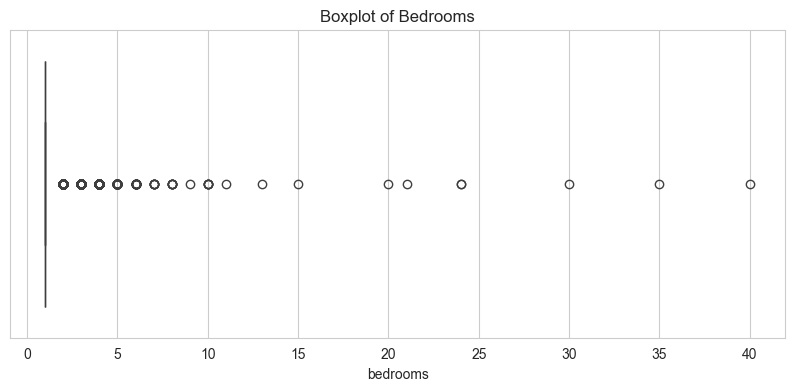

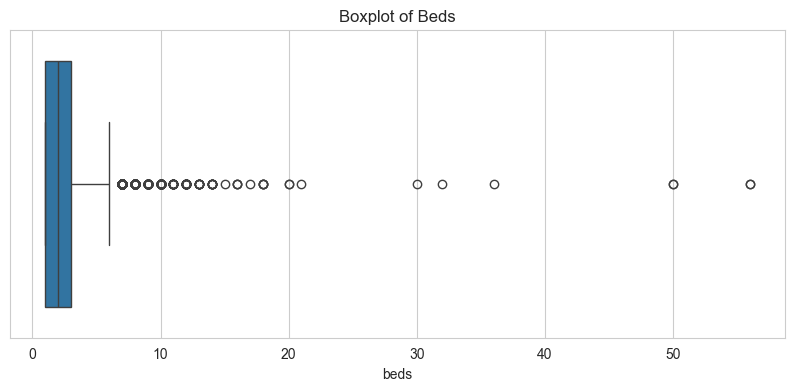

In [831]:
# price looks better now. lets see bedrooms
# Visualize bedrooms
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['bedrooms'])
plt.title('Boxplot of Bedrooms')
plt.show()

# Visualize beds
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['beds'])
plt.title('Boxplot of Beds')
plt.show()


In [832]:
# It looks like there are many bedrooms and beds are more than 10 even.
# Here I just want to use some human sense to use 8 as the threshold
df_temp = df_cleaned[(df_cleaned['bedrooms'] > 8) & ((df_cleaned['beds'] < 8) | (df_cleaned['accommodates'] < 8))]
df_temp

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
1869,26475847,4~6 Guests: Tokyo guest house 2020,12014384,Arakawa Ku,35.743930,139.770450,Private room in condominium (condo),Private room,4,30.000000,50.000000,16000.000000,2,1,1,1,1,2021-10-29,1,2,362,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
2078,27564241,5～6名様都心日暮里駅・町屋駅・赤土小学至近 Tokyo guest house 2020,12014384,Arakawa Ku,35.742340,139.771850,Room in hotel,Private room,5,35.000000,50.000000,20000.000000,3,1,1,1,1,2021-10-29,3,2,301,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2751,30239507,田端王子ホテル，ダブルルーム,227093869,Kita Ku,35.739110,139.766520,Room in hotel,Private room,2,40.000000,1.000000,30000.000000,1,1,0,1,1,2021-10-29,2,2,89,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
8830,46824094,10名カプセルベット貸切部屋 東京大手町ホステル M,202197609,Chiyoda Ku,35.688950,139.766860,Private room in hostel,Private room,10,10.000000,1.000000,12000.000000,2,1,0,1,1,2021-10-29,0,21,90,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9202,48553945,house ikebukuro,327891112,Toshima Ku,35.732620,139.705800,Private room in hostel,Private room,2,21.000000,1.000000,3614.000000,1,1,0,1,1,2021-10-29,0,4,94,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [833]:
# get rid of the ones
df_cleaned = df_cleaned[~df_cleaned.index.isin(df_temp.index)]
df_temp2 = df_cleaned[(df_cleaned['bedrooms'] > 8)]
df_temp2.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,11.000000,39648029.272727,9115935.964960,16848056.000000,36033709.000000,42546173.000000,45964174.500000,49134924.000000
host_id,11.000000,206075797.181818,110759474.593391,26653786.000000,155166143.000000,202197609.000000,250976780.000000,396299907.000000
latitude,11.000000,35.672337,0.057875,35.570550,35.655285,35.690410,35.699595,35.747410
longitude,11.000000,139.743829,0.057989,139.652700,139.707910,139.734700,139.779005,139.849660
accommodates,11.000000,14.818182,2.400757,10.000000,15.500000,16.000000,16.000000,16.000000
bedrooms,11.000000,14.181818,5.793413,9.000000,10.000000,11.000000,17.500000,24.000000
beds,11.000000,21.363636,17.488698,10.000000,10.500000,13.000000,19.000000,56.000000
price,11.000000,50281.727273,35002.215727,19800.000000,25000.000000,38857.000000,57857.000000,130000.000000
minimum_nights,11.000000,1.727273,0.786245,1.000000,1.000000,2.000000,2.000000,3.000000
has_availability,11.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [834]:
# still looks like there are some abnormal values, with price less than the median
df_temp = df_cleaned[(df_cleaned['price'] <= df_temp2['price'].quantile(0.5)) & (df_cleaned['bedrooms'] > 8)]
df_temp

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
3996,34345117,GP1/max 24 rooms/88 person/TOKYO HANEDA SHINAGAWA,250976780,Ota Ku,35.570550,139.733140,Entire serviced apartment,Entire home/apt,16,24.000000,56.000000,25000.000000,3,1,1,1,1,2021-10-29,1,25,89,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4073,34518132,GP2/max 24 rooms/88 person/TOKYO HANEDA SHINAGAWA,250976780,Ota Ku,35.572600,139.734700,Entire serviced apartment,Entire home/apt,16,24.000000,56.000000,25000.000000,3,1,1,1,1,2021-10-29,2,25,89,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7128,42546173,【最大10名ワンフロア貸切】10個のプライベート確保 半個室ベットcommun ryogok...,178584176,Sumida Ku,35.693270,139.790800,Private room in hostel,Private room,10,10.000000,10.000000,19800.000000,1,1,0,1,1,2021-10-29,8,3,132,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
7913,44065798,MyTokyoApt ~ White Terrace Multiple Rooms,131748110,Setagaya Ku,35.632680,139.652700,Entire rental unit,Entire home/apt,16,10.000000,10.000000,38857.000000,1,1,1,1,1,2021-10-29,0,37,365,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8828,46823854,10ベット部屋貸切！ 東京大手町ホステル5階 L,202197609,Chiyoda Ku,35.690610,139.765830,Private room in hostel,Private room,10,10.000000,10.000000,30214.000000,2,1,0,1,1,2021-10-29,0,21,90,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
8832,46824491,最大20名宿泊可能！東京大手町・好立地ホステル5階フロアまるまる貸切！,202197609,Chiyoda Ku,35.690410,139.767210,Private room in hostel,Private room,16,20.000000,20.000000,21371.000000,2,1,0,1,1,2021-10-29,0,21,90,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [835]:
df_temp = df_temp[df_temp['beds'] == 56]
df_temp

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
3996,34345117,GP1/max 24 rooms/88 person/TOKYO HANEDA SHINAGAWA,250976780,Ota Ku,35.570550,139.733140,Entire serviced apartment,Entire home/apt,16,24.000000,56.000000,25000.000000,3,1,1,1,1,2021-10-29,1,25,89,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4073,34518132,GP2/max 24 rooms/88 person/TOKYO HANEDA SHINAGAWA,250976780,Ota Ku,35.572600,139.734700,Entire serviced apartment,Entire home/apt,16,24.000000,56.000000,25000.000000,3,1,1,1,1,2021-10-29,2,25,89,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [836]:
# Two records with beds of 56 do not seem to be reasonable.
# Let's remove them
df_cleaned = df_cleaned[~df_cleaned.index.isin(df_temp.index)]
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10345.000000,36091647.710005,10961461.189197,197677.000000,29685222.000000,38581617.000000,43716472.000000,53014539.000000
host_id,10345.000000,198467618.283229,117505055.388865,771694.000000,84889989.000000,210081038.000000,298230439.000000,428038217.000000
latitude,10345.000000,35.696801,0.041109,35.540970,35.685870,35.702650,35.719640,35.830640
longitude,10345.000000,139.736296,0.071790,139.095680,139.700960,139.732230,139.785020,139.911580
accommodates,10345.000000,4.181827,2.975684,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10345.000000,1.386660,0.888036,1.000000,1.000000,1.000000,1.000000,20.000000
beds,10345.000000,2.571580,2.029349,1.000000,1.000000,2.000000,3.000000,36.000000
price,10345.000000,11301.332528,13804.149119,825.000000,4480.000000,7286.000000,12766.000000,195714.000000
minimum_nights,10345.000000,3.639826,21.473932,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10345.000000,0.996520,0.058891,0.000000,1.000000,1.000000,1.000000,1.000000


In [837]:
# Have another look on beds > 8
df_cleaned[(df_cleaned['bedrooms'] > 8)]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water
749,16848056,52 people can stay,57699141,Taito Ku,35.705920,139.794980,Entire rental unit,Entire home/apt,16,13.000000,18.000000,130000.000000,1,1,0,1,1,2021-10-29,8,27,90,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4869,37549286,Port House Shibuya (All room rent out),26653786,Shibuya Ku,35.677890,139.677280,Entire residential home,Entire home/apt,16,10.000000,13.000000,50000.000000,2,1,0,1,1,2021-10-29,1,2,53,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5093,38367996,RUMA INN - 2MINS FROM IKEBUKURO MAXIMUM 27 GUESTS,215606612,Toshima Ku,35.732600,139.730960,Entire rental unit,Entire home/apt,16,9.000000,18.000000,97143.000000,1,1,0,1,1,2021-10-29,0,14,23,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
7128,42546173,【最大10名ワンフロア貸切】10個のプライベート確保 半個室ベットcommun ryogok...,178584176,Sumida Ku,35.693270,139.790800,Private room in hostel,Private room,10,10.000000,10.000000,19800.000000,1,1,0,1,1,2021-10-29,8,3,132,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
7913,44065798,MyTokyoApt ~ White Terrace Multiple Rooms,131748110,Setagaya Ku,35.632680,139.652700,Entire rental unit,Entire home/apt,16,10.000000,10.000000,38857.000000,1,1,1,1,1,2021-10-29,0,37,365,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8195,45104495,PortHouse Hatsudai (All 11 rooms rent out),353893259,Shibuya Ku,35.681770,139.684860,Entire residential home,Entire home/apt,16,11.000000,11.000000,60000.000000,2,1,1,1,1,2021-10-29,1,3,345,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8828,46823854,10ベット部屋貸切！ 東京大手町ホステル5階 L,202197609,Chiyoda Ku,35.690610,139.765830,Private room in hostel,Private room,10,10.000000,10.000000,30214.000000,2,1,0,1,1,2021-10-29,0,21,90,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
8832,46824491,最大20名宿泊可能！東京大手町・好立地ホステル5階フロアまるまる貸切！,202197609,Chiyoda Ku,35.690410,139.767210,Private room in hostel,Private room,16,20.000000,20.000000,21371.000000,2,1,0,1,1,2021-10-29,0,21,90,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
9393,49134924,大人数・長期滞在歓迎！40畳のお部屋！スポーツ観戦や研修、合宿に！,396299907,Katsushika Ku,35.747410,139.849660,Entire residential home,Entire home/apt,15,15.000000,13.000000,55714.000000,1,1,0,

In [838]:
# They are actually reasonable.
# After we just need to handle minimum nights

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10345 entries, 0 to 10413
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         10345 non-null  int64  
 1   name                                       10345 non-null  object 
 2   host_id                                    10345 non-null  int64  
 3   neighbourhood_cleansed                     10345 non-null  object 
 4   latitude                                   10345 non-null  float64
 5   longitude                                  10345 non-null  float64
 6   property_type                              10345 non-null  object 
 7   room_type                                  10345 non-null  object 
 8   accommodates                               10345 non-null  int64  
 9   bedrooms                                   10345 non-null  float64
 10  beds                       

## handle outliers

In [839]:
# Grab outliers because outliers are the extreme value or significantly different from other values in the dataset
# In regression analysis, outliers can lead to inaccurate and unreliable prediction results.
# Therefore, handling outliers is necessary in regression analysis.
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 0.25)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 2)

    return lower_limit, upper_limit

In [840]:
# Find lower and upper limit for target
feature = "price"
lower, upper = find_outliers_IQR_method(df_cleaned, feature)
lower, upper

(np.float64(2408.5), np.float64(29338.0))

In [841]:
# I think we are all good for now, for other future records the following process can be applied
# Remove outliers

df_lqr_method = df_cleaned[(df_cleaned[feature] > lower) & (df_cleaned[feature] < upper)]

print(f'Cleaned dataset : {df_lqr_method.shape}')
print(f'Outliers count: {len(df_cleaned) - len(df_lqr_method)}')


Cleaned dataset : (9376, 41)
Outliers count: 969


((array([-3.79465287, -3.56860934, -3.44446847, ...,  3.44446847,
          3.56860934,  3.79465287]),
  array([ 2409.,  2416.,  2418., ..., 29143., 29143., 29286.])),
 (np.float64(5438.926120475113),
  np.float64(8986.620520477814),
  np.float64(0.92977348042988)))

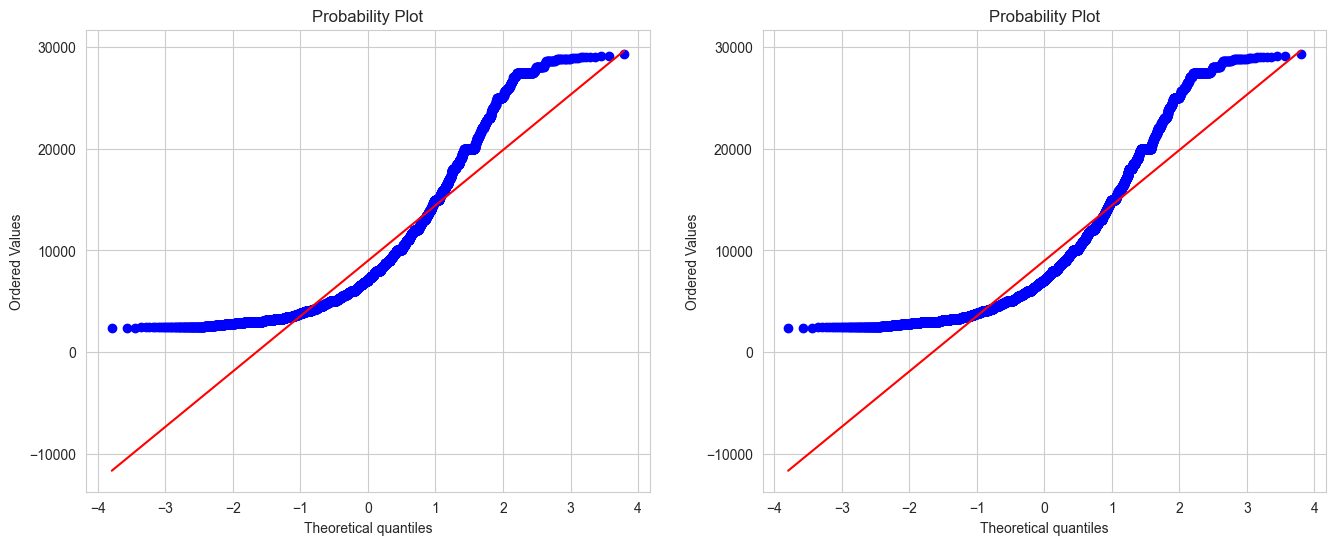

In [842]:
# Plot price and see if we can find any insight
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_lqr_method[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_lqr_method[feature], plot=plt)

In [843]:
# From the plot we see maybe LQR method is not too good for this dataset. 
# We maybe only need to remove the only 1 extreme outlier but not around 420 rows of data, 
# even with the different LQR factor defined.

# try Z-score method:
def find_outliers_ZScore_method(input_df, variable):
    df_z_scores = input_df.copy()

    # Calculate Z-scores for the specified variable droping any rows having NaN values
    z_scores = np.abs(stats.zscore(input_df[variable].dropna()))

    # Add Z-scores as a new column
    df_z_scores[variable + '_Z'] = z_scores

    return df_z_scores

In [844]:
# Calculate Z-scores
df_z_scores = find_outliers_ZScore_method(df_cleaned.copy(), feature)
df_z_scores.head()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,host_is_superhost,host_has_profile_pic,host_identity_verified,calendar_last_scraped,number_of_reviews,calculated_host_listings_count,availability_365,host_verifications_email,host_verifications_ phone,host_verifications_ government_id,host_verifications_ reviews,host_verifications_ jumio,host_verifications_ offline_government_id,host_verifications_ selfie,host_verifications_ identity_manual,host_verifications_ google,host_verifications_ work_email,amenities_ Hair dryer,amenities_ Essentials,amenities_ Long term stays allowed,amenities_ Smoke alarm,amenities_ Wifi,amenities_ Hangers,amenities_ Kitchen,amenities_ Heating,amenities_ Fire extinguisher,amenities_ Hot water,price_Z
0,197677,Oshiage Holiday Apartment,964081,Sumida Ku,35.717070,139.826080,Entire rental unit,Entire home/apt,4,1.000000,2.000000,11000.000000,3,1,0,1,0,2021-10-29,165,1,363,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.021830
1,776070,Kero-kero house room 1,801494,Kita Ku,35.738440,139.769170,Private room in residential home,Private room,2,1.000000,1.000000,7950.000000,3,1,1,1,1,2021-10-29,228,1,245,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.242789
2,1196177,Stay with host Cozy private room Senju area,5686404,Adachi Ku,35.744750,139.797310,Private room in residential home,Private room,2,1.000000,2.000000,3000.000000,2,1,1,1,1,2021-10-29,95,1,88,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.601394
3,1249571,Unique stay! New&1min to the subway,6809418,Shibuya Ku,35.651110,139.721650,Entire residential home,Entire home/apt,3,1.000000,1.000000,32571.000000,4,1,1,1,1,2021-10-29,102,1,320,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.540891
4,1298200,Pine House 2 Bed Room + 2 Toilets,6606987,Katsushika Ku,35.738500,139.851670,Entire residential home,Entire home/apt,4,2.000000,4.000000,11286.000000,4,1,1,1,1,2021-10-29,339,2,183,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.001111


In [845]:
df_z_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10345.000000,36091647.710005,10961461.189197,197677.000000,29685222.000000,38581617.000000,43716472.000000,53014539.000000
host_id,10345.000000,198467618.283229,117505055.388865,771694.000000,84889989.000000,210081038.000000,298230439.000000,428038217.000000
latitude,10345.000000,35.696801,0.041109,35.540970,35.685870,35.702650,35.719640,35.830640
longitude,10345.000000,139.736296,0.071790,139.095680,139.700960,139.732230,139.785020,139.911580
accommodates,10345.000000,4.181827,2.975684,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10345.000000,1.386660,0.888036,1.000000,1.000000,1.000000,1.000000,20.000000
beds,10345.000000,2.571580,2.029349,1.000000,1.000000,2.000000,3.000000,36.000000
price,10345.000000,11301.332528,13804.149119,825.000000,4480.000000,7286.000000,12766.000000,195714.000000
minimum_nights,10345.000000,3.639826,21.473932,1.000000,1.000000,1.000000,2.000000,999.000000
has_availability,10345.000000,0.996520,0.058891,0.000000,1.000000,1.000000,1.000000,1.000000


In [846]:
# Remove outliers where |Z| > mean
df_z_score_cleaned = df_z_scores[df_z_scores[feature+'_Z'] < df_z_scores[feature+'_Z'].mean()]

print(f'Cleaned dataset : {df_z_score_cleaned.shape}')
print(f'Outliers count: {len(df_z_scores) - len(df_z_score_cleaned)}')

Cleaned dataset : (7322, 42)
Outliers count: 3023


((array([-3.73285209, -3.50328877, -3.37704644, ...,  3.37704644,
          3.50328877,  3.73285209]),
  array([ 3600.,  3600.,  3600., ..., 19000., 19000., 19000.])),
 (np.float64(3753.9357933298097),
  np.float64(8511.967631794592),
  np.float64(0.9559615005009464)))

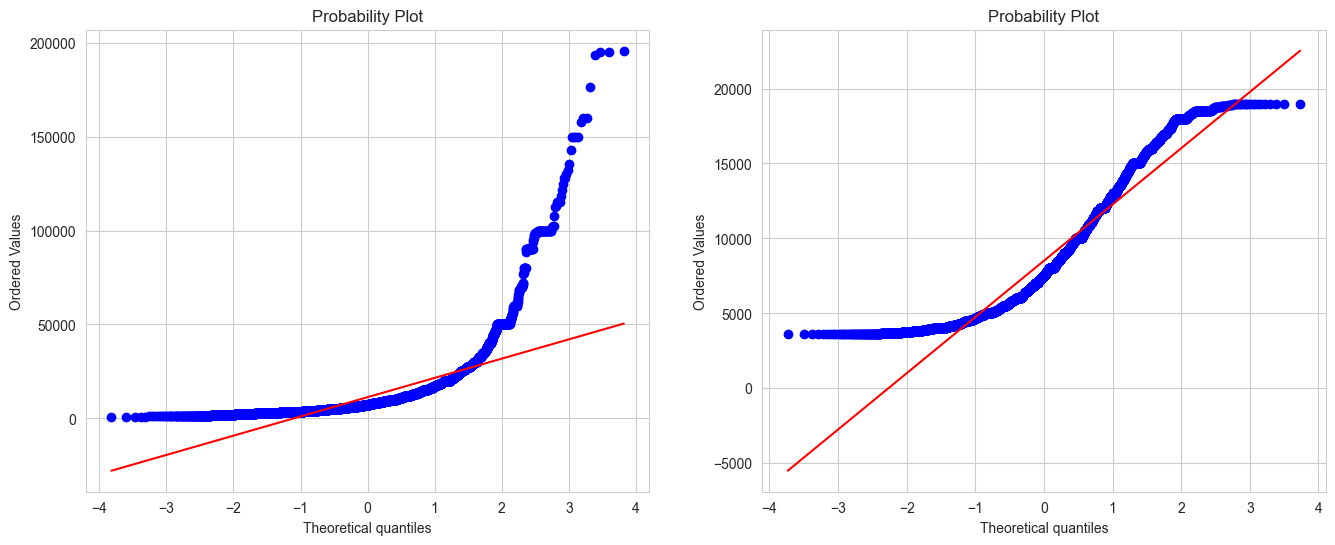

In [847]:
# Plot price and see if we can find any insight
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_z_scores[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_z_score_cleaned[feature], plot=plt)

In [848]:
# Plot is better than the outcome of LQR method.


<Axes: >

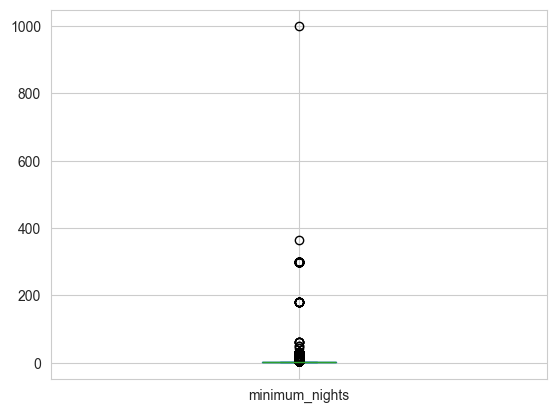

In [849]:
# Start to have a look on the abnormal value at minimum_nights column
# Can use a graph to investigate on values in this column
df_cleaned['minimum_nights'].plot.box()

<Axes: >

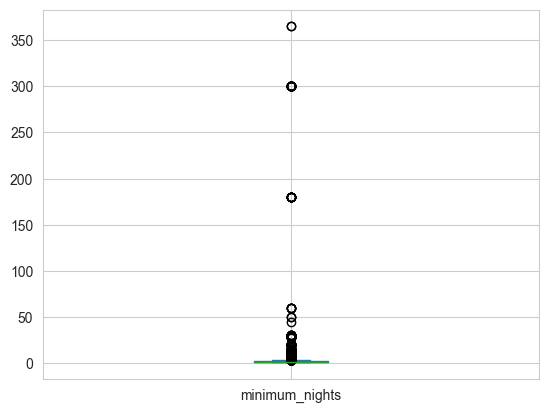

In [850]:
# look like not much values are abnormal, we can process this to 365 days instead
df_cleaned.loc[df_cleaned['minimum_nights'] > 365, 'minimum_nights'] = 365

df_cleaned['minimum_nights'].plot.box()

In [851]:
# Looks better now
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10345.000000,36091647.710005,10961461.189197,197677.000000,29685222.000000,38581617.000000,43716472.000000,53014539.000000
host_id,10345.000000,198467618.283229,117505055.388865,771694.000000,84889989.000000,210081038.000000,298230439.000000,428038217.000000
latitude,10345.000000,35.696801,0.041109,35.540970,35.685870,35.702650,35.719640,35.830640
longitude,10345.000000,139.736296,0.071790,139.095680,139.700960,139.732230,139.785020,139.911580
accommodates,10345.000000,4.181827,2.975684,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10345.000000,1.386660,0.888036,1.000000,1.000000,1.000000,1.000000,20.000000
beds,10345.000000,2.571580,2.029349,1.000000,1.000000,2.000000,3.000000,36.000000
price,10345.000000,11301.332528,13804.149119,825.000000,4480.000000,7286.000000,12766.000000,195714.000000
minimum_nights,10345.000000,3.578540,19.441462,1.000000,1.000000,1.000000,2.000000,365.000000
has_availability,10345.000000,0.996520,0.058891,0.000000,1.000000,1.000000,1.000000,1.000000


Start to see whether if need to handle duplicate

In [852]:
# Investigate on duplicated values
for col in df_cleaned.columns:
    duplicated_count = df_cleaned[col].duplicated().sum()
    print(f'Column: {col}')
    print(f'Duplicate Count: {duplicated_count}')
    print('*' * 50)

# # If need to identify duplicate records by multiple columns, use the following.
# # Do not apply in this case that we are analyzing
# duplicate_multi_cols = df_cleaned[
#     df_cleaned.duplicated(
#         subset = ['bedrooms','beds'],
#         keep=False
#     )
# ]

# duplicate_multi_cols.shape
# duplicate_multi_cols.sort_values('bedrooms').head(5)

# # Remove duplicate rows from the DataFrame considering all columns
# remove_duplicates_all_cols = df_cleaned.drop_duplicates()

# # Remove duplicates based on columns
# remove_duplicate_multi_cols = df_cleaned.drop_duplicates(
#     subset=['bedrooms','beds'],
#     keep='first' # Keep the first record, otherwise all duplicates will be gone. Can define first or last here
# )
# remove_duplicate_multi_cols.shape

Column: id
Duplicate Count: 0
**************************************************
Column: name
Duplicate Count: 796
**************************************************
Column: host_id
Duplicate Count: 7773
**************************************************
Column: neighbourhood_cleansed
Duplicate Count: 10296
**************************************************
Column: latitude
Duplicate Count: 4006
**************************************************
Column: longitude
Duplicate Count: 3171
**************************************************
Column: property_type
Duplicate Count: 10279
**************************************************
Column: room_type
Duplicate Count: 10341
**************************************************
Column: accommodates
Duplicate Count: 10329
**************************************************
Column: bedrooms
Duplicate Count: 10331
**************************************************
Column: beds
Duplicate Count: 10322
*************************************************

In [853]:
# For this dataset that we are dealing with, check whether if there are any duplicate of all columns
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bedrooms, beds, price, minimum_nights, has_availability, host_is_superhost, host_has_profile_pic, host_identity_verified, calendar_last_scraped, number_of_reviews, calculated_host_listings_count, availability_365, host_verifications_email, host_verifications_ phone, host_verifications_ government_id, host_verifications_ reviews, host_verifications_ jumio, host_verifications_ offline_government_id, host_verifications_ selfie, host_verifications_ identity_manual, host_verifications_ google, host_verifications_ work_email, amenities_ Hair dryer, amenities_ Essentials, amenities_ Long term stays allowed, amenities_ Smoke alarm, amenities_ Wifi, amenities_ Hangers, amenities_ Kitchen, amenities_ Heating, amenities_ Fire extinguisher, amenities_ Hot water]
Index: []


In [854]:
# So there're no duplicate of all columns which is good.

# Process reviews dataset

In [855]:
# Fill missing values in reviews dataset
df_review['comments'].fillna("None", inplace=True)

C:\Users\mouhu\AppData\Local\Temp\ipykernel_31800\3039518218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_review['comments'].fillna("None", inplace=True)


In [856]:
# Generate "Year"、“Month"、”Day“ columns according to the date column
df_review['date'] = pd.to_datetime(df_review['date'])

df_review['Year'] = df_review['date'].dt.year
df_review['Month'] = df_review['date'].dt.month
df_review['Day'] = df_review['date'].dt.day
df_review['day_name'] = df_review['date'].dt.day_name()

# Join the listing_df 
listing_join_columns = ['id', 'price', 'neighbourhood_cleansed', 'property_type', 'room_type', 'name',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']
review_info_df = pd.DataFrame(df_review.groupby('listing_id').count()['comments'].sort_values(ascending=False))
review_info_df = pd.merge(review_info_df, df_listing[listing_join_columns], left_index=True, right_on='id')
review_info_df.rename({'comments': 'comment counts'}, axis=1, inplace=True)

# Convert this price column into a float64
review_info_df['price'] = review_info_df['price'].replace('[$,]','',regex=True).astype(np.float64)

# Fill missing values in review scores columns with 0
review_score_columns = [col for col in review_info_df.columns if 'review_scores' in col]

for col in review_score_columns:
    review_info_df[col] = review_info_df[col].fillna(0)

review_info_df.head()

,comment counts,id,price,neighbourhood_cleansed,property_type,room_type,name,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1061,489,21015730,3151.000000,Taito Ku,Shared room in hostel,Shared room,A cozy private space! Mixed Dormitory with Wi-Fi,4.780000,4.870000,4.850000,4.920000,4.900000,4.800000,4.820000
59,481,4050925,20000.000000,Taito Ku,Entire residential home,Entire home/apt,Airport transfer service&Asakusa traditional h...,4.940000,4.950000,4.930000,4.950000,4.920000,4.930000,4.910000
3592,445,33023952,15403.000000,Koto Ku,Entire rental unit,Entire home/apt,H2O Stay Morishita 4ppl wifi 5min to station,4.790000,4.830000,4.760000,4.830000,4.780000,4.400000,4.630000
1703,441,25377337,6377.000000,Chuo Ku,Room in boutique hotel,Private room,【Ginza/Tokyo area】 Junior Suite (Free Wi-Fi),4.760000,4.820000,4.880000,4.560000,4.660000,4.560000,4.710000
1776,408,25924772,3286.000000,Taito Ku,Room in hostel,Hotel room,Tokyo BEST TOWN LANDSCAPE DEVELOPMENT AWARD wi...,4.690000,4.800000,4.800000,4.870000,4.810000,4.710000,4.800000


In [857]:
# Some general insights from reviews dataset

print("There are {} reviewers leave their comments.".format(df_review['reviewer_id'].unique().shape[0]))
print("There are {} listings were commented.".format(df_review['listing_id'].unique().shape[0]))
print("TOP 10 commented listing:\n")
print(review_info_df['comment counts'].head(10))

There are 242128 reviewers leave their comments.
There are 8296 listings were commented.
TOP 10 commented listing:

1061    489
59      481
3592    445
1703    441
1776    408
2274    395
8102    373
2481    359
2313    350
225     343
Name: comment counts, dtype: int64


In [858]:
review_info_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comment counts,8296.000000,33.141996,46.800332,1.000000,4.000000,16.000000,42.000000,489.000000
id,8296.000000,34009963.591249,10906917.410539,197677.000000,27769579.250000,35140771.500000,42392570.500000,52765143.000000
price,8296.000000,12412.804966,42406.894699,0.000000,4287.500000,6900.000000,12064.250000,2185000.000000
review_scores_rating,8296.000000,4.667432,0.429235,0.000000,4.560000,4.760000,4.920000,5.000000
review_scores_accuracy,8296.000000,4.739864,0.413156,0.000000,4.670000,4.840000,4.980000,5.000000
review_scores_cleanliness,8296.000000,4.658597,0.474952,0.000000,4.550000,4.790000,4.950000,5.000000
review_scores_checkin,8296.000000,4.790653,0.387674,0.000000,4.750000,4.890000,5.000000,5.000000
review_scores_communication,8296.000000,4.790251,0.403257,0.000000,4.750000,4.900000,5.000000,5.000000
review_scores_location,8296.000000,4.685665,0.395942,0.000000,4.570000,4.770000,4.930000,5.000000
review_scores_value,8296.000000,4.639829,0.410318,0.000000,4.520000,4.710000,4.870000,5.000000


# Pandas Profile Report

In [ ]:
# We have the option to do the following to create a report, just list this option here
# from ydata_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df, title = "Profiling Report")
# profile.to_file('ProfilingReport.html')
# profile.to_file('ProfilingReport.json')